In [1]:
import os
import torch
import cv2
import matplotlib.pyplot as plt
from PIL import Image
import supervision as sv
# local improts
os.chdir("..")
from modules.GroundingDINO.groundingdino.util.inference import Model as DinoModel

/Users/niche/Library/CloudStorage/OneDrive-VirginiaTech/_03_Papers/2023/finding_ants/models/GroundingDINO/groundingdino/models/GroundingDINO/ms_deform_attn.py:31: UserWarning: Failed to load custom C++ ops. Running on CPU mode Only!
  warnings.warn("Failed to load custom C++ ops. Running on CPU mode Only!")


In [2]:
ROOT = os.getcwd()
print("ROOT:", ROOT)
os.chdir(ROOT)

DIR_DINO = os.path.join(ROOT, "modules", "GroundingDINO")
DEVICE = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
# GROUNDING DINO
GROUNDING_DINO_CONFIG_PATH = os.path.join(DIR_DINO,
                                        "groundingdino",
                                        "config", "GroundingDINO_SwinT_OGC.py")
GROUNDING_DINO_CHECKPOINT_PATH = os.path.join(DIR_DINO, "gdino_swint_ogc.pth")

ROOT: /Users/niche/Library/CloudStorage/OneDrive-VirginiaTech/_03_Papers/2023/cowsformer


In [3]:
grounding_dino_model = DinoModel(model_config_path=GROUNDING_DINO_CONFIG_PATH,
                                 model_checkpoint_path=GROUNDING_DINO_CHECKPOINT_PATH,
                                 device=DEVICE)

/Users/niche/miniforge3/envs/niche/lib/python3.9/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/TensorShape.cpp:3484.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


final text_encoder_type: bert-base-uncased


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [8]:
grounding_dino_model.model

GroundingDINO(
  (transformer): Transformer(
    (encoder): TransformerEncoder(
      (layers): ModuleList(
        (0-5): 6 x DeformableTransformerEncoderLayer(
          (self_attn): MultiScaleDeformableAttention(
            (sampling_offsets): Linear(in_features=256, out_features=256, bias=True)
            (attention_weights): Linear(in_features=256, out_features=128, bias=True)
            (value_proj): Linear(in_features=256, out_features=256, bias=True)
            (output_proj): Linear(in_features=256, out_features=256, bias=True)
          )
          (dropout1): Dropout(p=0.0, inplace=False)
          (norm1): LayerNorm((256,), eps=1e-05, elementwise_affine=True)
          (linear1): Linear(in_features=256, out_features=2048, bias=True)
          (dropout2): Dropout(p=0.0, inplace=False)
          (linear2): Linear(in_features=2048, out_features=256, bias=True)
          (dropout3): Dropout(p=0.0, inplace=False)
          (norm2): LayerNorm((256,), eps=1e-05, elementwise_aff

In [16]:
def load_image(filename):
    PATH_IMG = os.path.join(ROOT, "data", "cow100", "images", filename)
    image_bgr = cv2.imread(PATH_IMG)
    image = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
    return image

def run_model(image, prompt, BOX_THRED=0.35, TEXT_THRED=0.25):
    # prompt must be {all ___s}
    detections = grounding_dino_model.predict_with_classes(
        image=image,
        classes=[prompt],
        box_threshold=BOX_THRED,
        text_threshold=TEXT_THRED,
    )
    box_annotator = sv.BoxAnnotator()
    annotated_frame = box_annotator.annotate(scene=image.copy(),
                                            detections=detections)
    sv.plot_image(annotated_frame, (16, 16))

/Users/niche/miniforge3/envs/niche/lib/python3.9/site-packages/transformers/modeling_utils.py:862: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(
/Users/niche/miniforge3/envs/niche/lib/python3.9/site-packages/torch/utils/checkpoint.py:31: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")


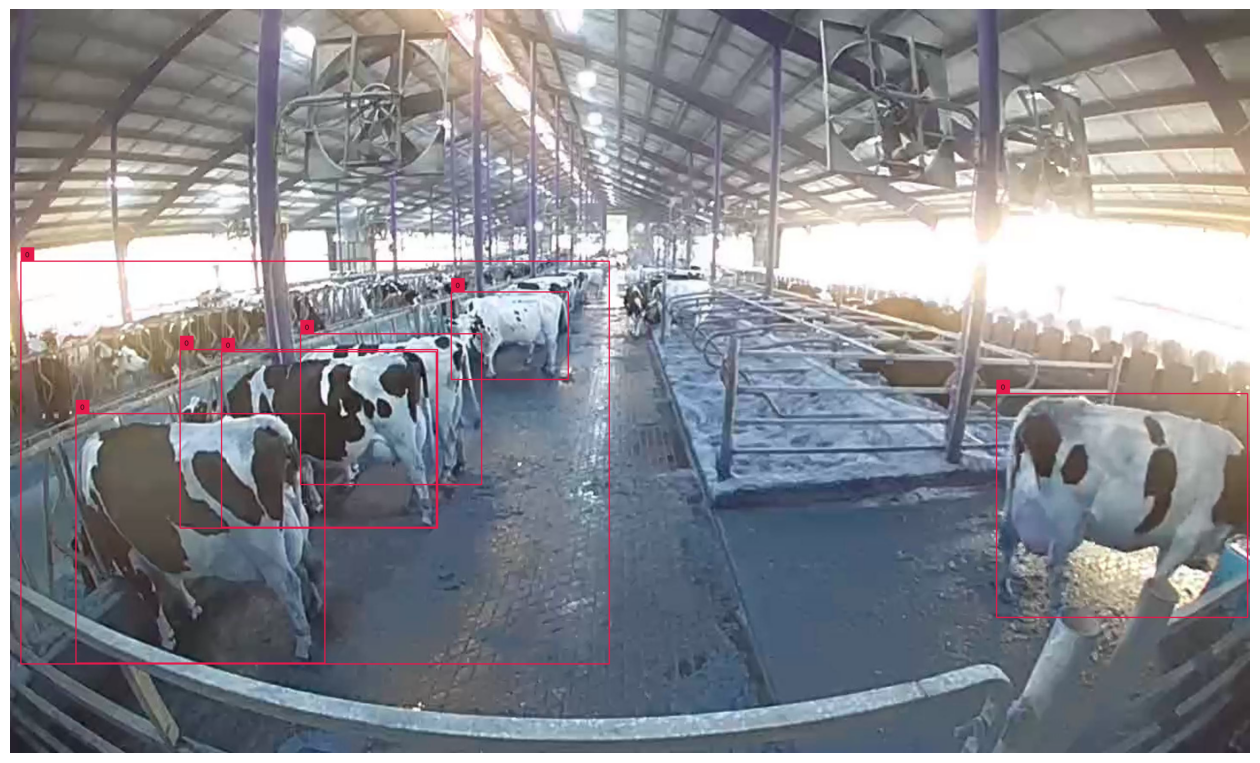

In [17]:
run_model(image=load_image("img_2.jpg"),
          prompt="all cows",
          BOX_THRED=0.35,
          TEXT_THRED=0.25)

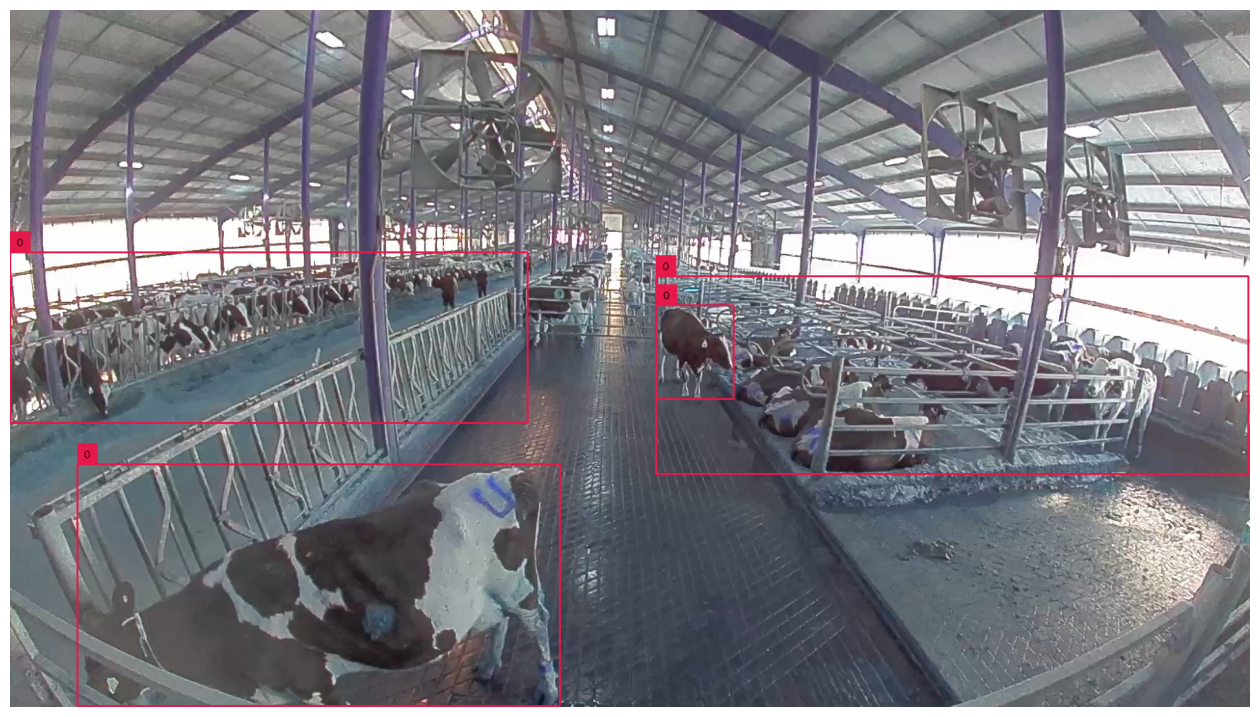

In [19]:
run_model(image=load_image("img_1_28.jpg"),
          prompt="all cows",
          BOX_THRED=0.3,
          TEXT_THRED=0.2)